In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import matplotlib.ticker as ticker
import matplotlib as mpl
import itertools
%matplotlib notebook

datadirec = '/Volumes/lab-goehringn/home/users/blandt/ModelData/dimer_kinetic_antagonism_effective_exponent_scheme4/'

In [11]:
# Param boundaries
p1_boundaries = np.linspace(0.01, 0.99, 5)  # frac
p2_boundaries = (0, 0.25, 0.5, 0.75, 1)  # beta
nsims = 10

# All parameter combinations
p1_vals = np.linspace(p1_boundaries[0], p1_boundaries[-1], nsims * (len(p1_boundaries) - 1) + 1)
p2_vals = np.linspace(p2_boundaries[0], p2_boundaries[-1], nsims * (len(p2_boundaries) - 1) + 1)
X, Y = np.meshgrid(p1_vals, p2_vals)

# Split parameter ranges
param_range_groups = []
for i in range(len(p1_boundaries) - 1):
    for j in range(len(p2_boundaries) - 1):
        p1_range = [p1_boundaries[i], p1_boundaries[i + 1]]
        p2_range = [p2_boundaries[j], p2_boundaries[j + 1]]
        param_range_groups.append([p1_range, p2_range])
len_param_range_groups = len(param_range_groups)

# Hyperparameters
koff_vals = [0.0001, 0.001, 0.01]
kant_vals = np.linspace(0, 0.1, 4)
koff_kant_vals = list(itertools.product(koff_vals, kant_vals))

### Raw data

In [12]:
def func(n_start):
    fig, ax = plt.subplots()
    fig.set_size_inches(3.5, 3)
    
    # Compile results
    res_total = np.zeros([(len(p1_boundaries) - 1) * nsims + 1, (len(p2_boundaries) - 1) * nsims + 1])
    count = n_start
    for i in range(len(p1_boundaries) - 1):
        for j in range(len(p2_boundaries) - 1):
            res = np.loadtxt(datadirec + str(count) + '/Res.txt')    
            res_total[i * nsims: (i + 1) * nsims + 1, j * nsims: (j + 1) * nsims + 1] = res
            count += 1
        
    # Plot
    im = ax.imshow(res_total.T, extent=[p1_boundaries[0], p1_boundaries[-1], p2_boundaries[0], p2_boundaries[-1]], 
              origin='lower', aspect=1)
    ax.set_yticks(p2_boundaries)
    ax.set_xticks([0.01, 0.25, 0.5, 0.75, 0.99])
    ax.set_xlabel(r'$\epsilon$')
    ax.set_ylabel(r'$\beta$') 
    ax.tick_params(axis='both', labelsize=8)
    
#     # Contours
#     contours = ax.contour(X, Y, res_total.T, colors='white', 
#                           levels=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.49])
#     ax.clabel(contours, inline=True, fontsize=6, fmt='%.2f')

    # Colorbar
    cbar = fig.colorbar(im)
    cbar.ax.tick_params(labelsize=8) 
    cbar.ax.set_ylabel('')

    # Finalise
    fig.tight_layout()

In [13]:
# for i, (_koff, _kant) in enumerate(koff_kant_vals):
#     print('koff = %s, kant = %s' % (_koff, _kant))
#     func(i * len_param_range_groups)

### Effective exponent

In [22]:
def func2(n_starts, vmin=0.9, vmax=1.6, cbar=False):
    fig, ax = plt.subplots()
    fig.set_size_inches(2.5, 2.5)
    
    # Compile results
    res_total = np.zeros([len(n_starts), (len(p1_boundaries) - 1) * nsims + 1, (len(p2_boundaries) - 1) * nsims + 1])
    for h, n_start in enumerate(n_starts):
        count = n_start
        for i in range(len(p1_boundaries) - 1):
            for j in range(len(p2_boundaries) - 1):
                res = np.loadtxt(datadirec + str(count) + '/Res.txt') 
                res_total[h, i * nsims: (i + 1) * nsims + 1, j * nsims: (j + 1) * nsims + 1] = res
                count += 1
    res_total -= res_total[0, :, :]
                
    # Effective exponent
    res_exp = np.zeros([(len(p1_boundaries) - 1) * nsims + 1, (len(p2_boundaries) - 1) * nsims + 1])
    for i in range(res_total.shape[1]):
        for j in range(res_total.shape[2]):
            y = res_total[1:, i, j]
            res_exp[i, j] = np.polyfit(np.log10(kant_vals[1:]), np.log10(y), 1, w=np.sqrt(y))[0]
        
    # Plot
    im = ax.imshow(res_exp.T, extent=[p1_boundaries[0], p1_boundaries[-1], p2_boundaries[0], p2_boundaries[-1]], 
              origin='lower', aspect=1, vmin=vmin, vmax=vmax)
    ax.set_yticks(p2_boundaries)
    ax.set_xticks([0.01, 0.25, 0.5, 0.75, 0.99])
    ax.set_xlabel('Dimerisation ' + r'$(\epsilon)$')
    ax.set_ylabel('Dimer resistance ' + r'$(\beta)$') 
    ax.tick_params(axis='both', labelsize=8)
        
    # Contours
    contours = ax.contour(X, Y, res_exp.T, colors='white', 
                          levels=np.arange(0.9, 1.8, 0.1), linewidths=1)
    ax.clabel(contours, inline=True, fontsize=6, fmt='%.2f')
    
    contours2 = ax.contour(X, Y, res_exp.T, colors='white', 
                          levels=[x for x in np.arange(0.9, 1.8, 0.01) if x not in np.arange(0.9, 1.8, 0.1)], 
                           linewidths=0.1)

    # Colorbar
    if cbar:
        cbar = fig.colorbar(im)
        cbar.ax.tick_params(labelsize=8) 
        cbar.ax.set_ylabel('')

    # Finalise
    fig.tight_layout()
    return fig, ax

koff = 0.0001
0


<IPython.core.display.Javascript object>


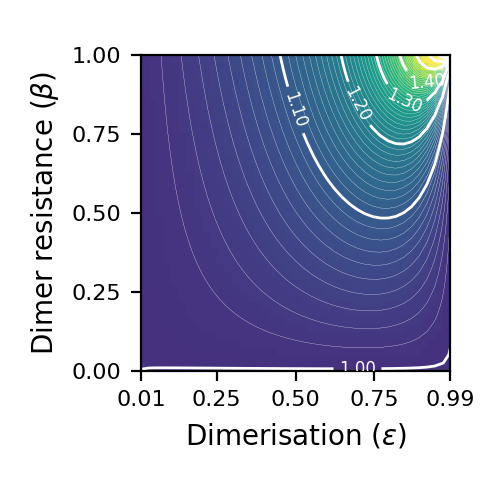

koff = 0.001
1


<IPython.core.display.Javascript object>


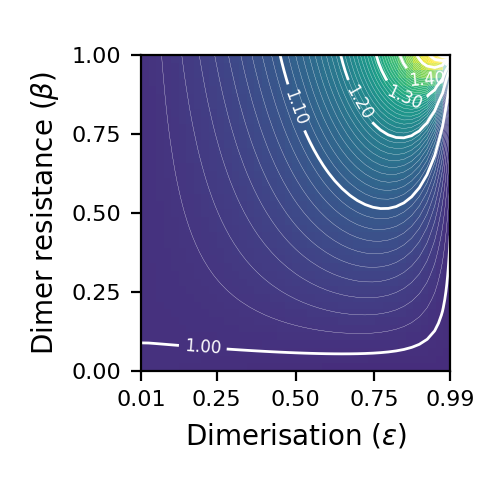

koff = 0.01
2


<IPython.core.display.Javascript object>


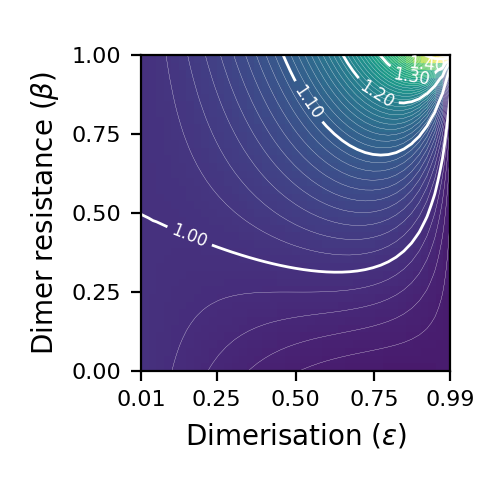

In [23]:
for i, _koff in enumerate(koff_vals):
    print('koff = %s' % _koff)
    print(i)
    func2([j * len_param_range_groups for j in range(i * len(kant_vals), (i + 1) * len(kant_vals))])

### For thesis

<IPython.core.display.Javascript object>


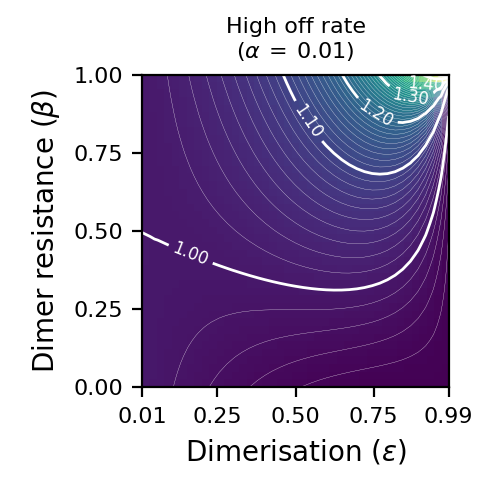

In [28]:
fig, ax = func2([j * len_param_range_groups for j in range(2 * len(kant_vals), (2 + 1) * len(kant_vals))],
               vmin=0.95, vmax=1.7, cbar=False)
ax.set_title('High off rate\n' + r'$(\alpha \: = \: 0.01)$', fontsize=8)
fig.subplots_adjust(top=0.85)
fig.savefig('Figs/effective_exponent_high_koff.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


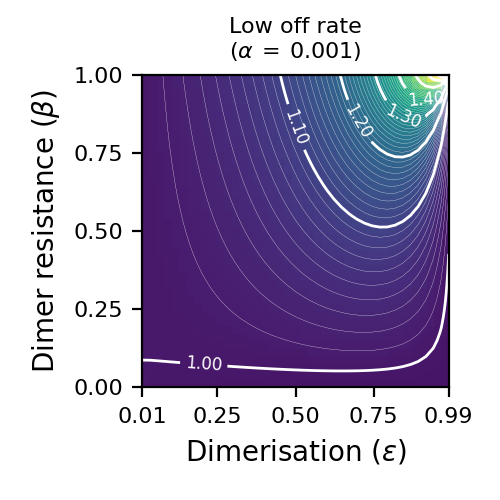

In [29]:
fig, ax = func2([j * len_param_range_groups for j in range(1 * len(kant_vals), (1 + 1) * len(kant_vals))],
               vmin=0.95, vmax=1.7, cbar=False)
ax.set_title('Low off rate\n' + r'$(\alpha \: = \: 0.001)$', fontsize=8)
fig.subplots_adjust(top=0.85)
fig.savefig('Figs/effective_exponent_low_koff.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


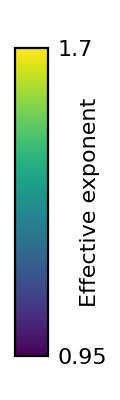

In [27]:
fig, ax = plt.subplots(figsize=(0.6, 2))
fig.subplots_adjust(right=0.4)
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('viridis'), ticks=[0, 1])
cbar.ax.set_yticklabels(['0.95', '1.7'])
cbar.ax.tick_params(size=0, labelsize=8)
ax.set_ylabel('Effective exponent', labelpad=-10, fontsize=8)
fig.savefig('Figs/effective_exponent_cbar.png', dpi=600, transparent=True)